# P2: Investifando uma Base de Dados

## Pedro Barbosa de Oliveira Filho

### Base de Dados:  *Tripulantes a bordo do Titanic (https://www.kaggle.com/c/titanic/data)*

### INTRODUÇÃO

O naufrágio do RMS Titanic é um dos mais desastrosos e famosos da história. Em 15 de abril de 1912, em sua viagem inaugural, o Titanic afundou após colidir com um iceberg, matando 1502 dentre 2224 pessoas (passageiros e tripulação). Esta tragédia chocou a comunidade internacional e resultou em avanços na segurança para navios.Uma das principais razões para o grande número de vítimas fatais neste naufrágio foi o número insuficiente de barcos salva-vidas para passageiros e tripulação.

O presente trabalho apresenta uma análise dos dados demográficos e informações referentes a 891 dos 2224 passageiros e tripulantes a bordo do Titanic. O objetivo deste trabalho não é apresentar conclusões definitivas sobre a sobrevivência de passageiros ou tripulantes do Titanic, mas sim investigar o conjunto de dados com base em um brainstorming de perguntas a serem respondidas no decorrer das análises.

### BASE DE DADOS ORIGINAL

In [1]:
# Importando a biblioteca Pandas
import pandas as pd

# Carregando dados dos passageiros e tripulantes do Titanic
titanic_data = pd.read_csv("titanic_data.csv")

# Cabeçalho do banco de dados
titanic_data.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


### DICIONÁRIO DE DADOS

In [2]:
# Importando a biblioteca Pandas
import pandas as pd

d = {"Definição": pd.Series(["Sobrevivência","Classe do Bilhete","Gênero",
                              "Idade em anos","nº Irmãos/Cônjuges a bordo do Titanic",
                              "nº Pais/Filhos a bordo do Titanic","nº do Bilhete",
                              "Tarifa de passageiros","nº da Cabine","Porto de embarque"],
                            index=["survival","pclass","sex","Age","sibsp","parch","ticket","fare","cabin","embarked"]),
     "Informação chave": pd.Series(["0 = Não, 1 = Sim","1 = 1ª, 2 = 2ª, 3 = 3ª",
                                    "","","","","","","",
                                    "C = Cherbourg, Q = Queenstown, S = Southampton"],
                                   index=["survival","pclass","sex","Age","sibsp","parch","ticket","fare","cabin","embarked"])
}

df = pd.DataFrame(d)
df

,Definição,Informação chave
survival,Sobrevivência,"0 = Não, 1 = Sim"
pclass,Classe do Bilhete,"1 = 1ª, 2 = 2ª, 3 = 3ª"
sex,Gênero,
Age,Idade em anos,
sibsp,nº Irmãos/Cônjuges a bordo do Titanic,
parch,nº Pais/Filhos a bordo do Titanic,
ticket,nº do Bilhete,
fare,Tarifa de passageiros,
cabin,nº da Cabine,
embarked,Porto de embarque,"C = Cherbourg, Q = Queenstown, S = Southampton"


### BRAINSTORM 

#### *Quais os fatores que, aparentemente, mais influenciaram a sobrevivência das pessoas a bordo do Titanic?*

1. Passageiros de classe sócio-econômica (*Pclass*) mais elevada apresentaram maior proporção de sobreviventes?
2. Houve diferença entre as proporções de sobreviventes para homens e mulheres?
3. Qual faixa de idade apresentou maior proporção de sobreviventes?
4. Passageiros com poucos parentes (irmãos, cônjugues, pais e filhos) apresentaram maior proporção de sobreviventes?
5. Passageiros que embarcaram em diferentes portos apresentaram diferentes proporções de sobreviventes?

### DATA WRANGLING

Primeiramente carregamos as bibliotecas necessária para análise e visualização dos dados.

In [3]:
# Bibliotecas para análise de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Observando as seis primeiras linhas da base de dados nota-se que as variáveis *Age* e *Cabin* possuim valores faltantes (NaN).

Para as análises seguintes, é interessante conhecer quantos valores faltantes cada variável da base de dados possui. O código abaixo apresneta esta contágem.

In [4]:
# Contágem do número de NaN por variável
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Nota-se que além das variáveis *Age* e *Cabin*, a variável *Embarked* também possui valores faltantes. Para as análises seguintes, substitui-se os valores faltantes da variável *Age* por suas mediana.

In [5]:
# Valor mediano da variável Age
titanic_data["Age"].median()

28.0

In [6]:
# Substituição de NaN por mediana na variável Age
titanic_data["Age"].fillna(titanic_data["Age"].median(), inplace=True)

Os dois valores faltantes da variável *Embarked* são substituidos pelo porto de embarque mais comum entre os passageiros e tripulantes. 

In [7]:
# Nº de passageiros e tripulantes por porto de embarque
titanic_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
# Fração de passageiros embarcados no porto de Southampton (S)
round(float(titanic_data["Embarked"].value_counts()[0])/float(titanic_data["Embarked"].count()),2)

0.72

Logo, substitui-se os valores faltantes da variável *Embarked* pelo porto de Southampton (S)

In [9]:
# Substituição de NaN por porto de Southampton (S) na variável Embarked
titanic_data["Embarked"].fillna("S", inplace=True)

O código abaixo mostra que os valores de faltantes das variáveis *Age* e *Embarked* foram substituidos. Os valores faltantes da variável *Cabin* não serão alterados, pois a mesma não será abordada nesta análise.

In [10]:
# Remoção da variável Cabin do conjunto de dados
titanic_data = titanic_data.drop("Cabin", 1)
# Contágem do número de NaN por variável
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Para as análises seguintes, é interessante atribuir categorias (criança, adolescente, adulto e idoso) para a variável *Age*. A função abaixo (*category_Age*) é utilizada para categorizar uma idade.

In [11]:
def category_Age(age):
    if age >= 60:
        return "Elderly"
    elif age >= 19:
        return "Adult"
    elif age >= 12:
        return "Teenager"
    else:
        return "Child"

A função *category_Ages* será utilizada para categorizar todos as valores da variável *Age*.

In [12]:
def category_Ages(ages):
    ages = pd.DataFrame(ages)
    return ages.applymap(category_Age)

O código abaixo adiciona a variável *AgeCategory* à base de dados.

In [13]:
titanic_data["AgeCategory"] = category_Ages(titanic_data["Age"])

Como ambas as variáveis *SibSp* e *Parch* referem-se a parentes dos passageiros ou tripulantes a bordo do Titanic, é interessante agrupar estas duas variáveis. O código abaixo combina as variáveis *SibSp* e *Parch* em uma nova variável *Family* e adiciona a mesma à base de dodos.

In [14]:
titanic_data["Family"] = titanic_data["SibSp"] + titanic_data["Parch"]

A base de dados encontra-se pronta para a realização das próximas análises.

In [15]:
# Cabeçalho do banco de dados
titanic_data.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeCategory,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adult,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult,0
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,Adult,0


### *1. Passageiros de classe sócio-econômica (*Pclass*) mais elevada apresentaram maior proporção de sobreviventes?*

A proporção de sobreviventes por classe sócio-econômica (Pclass) pode ser obtida através do código abaixo:

In [16]:
# Pivotamento das variáveis Pclass e Survived
titanic_data[["Pclass", "Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


O gráfico de barras empilhadas abaixo ilustra a taxa de sobrevivência de passageiros e tripulantes por classe sócio-econômica (*Pclass*):

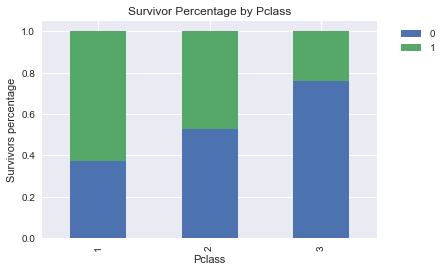

In [17]:
pclass_surv_perc = titanic_data.groupby(["Pclass", "Survived"]).size()/titanic_data.groupby("Pclass").size()
pclass_surv_perc.unstack().plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1.2, 1))
plt.title("Survivor Percentage by Pclass")
plt.ylabel("Survivors percentage")

Nota-se que as classes mais elevadas apresentaram maior taxa de sobrevivência (1 > 2 > 3). Tal observação pode indicar que passageiros de classe mais elevada foram privilegiados durante o naufrágio do Titanic. 

O gráfico de barras empilhadas abaixo ilustra o número de passageiros e tripulantes sobreviventes e mortos por classe sócio-econômica:

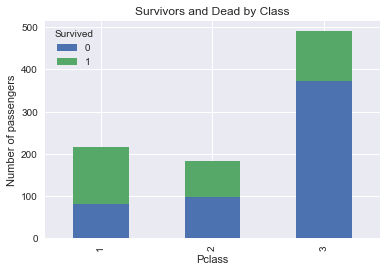

In [18]:
titanic_data.groupby(['Pclass', 'Survived']).size().unstack().plot.bar(stacked=True)
plt.title("Survivors and Dead by Class")
plt.ylabel("Number of passengers")

Nota-se que a maioria dos passageiros e tripulantes  a bordo do Titanic faziam parte da classe sócio-econômica 3.

### 2. *Houve diferença entre as proporções de sobreviventes para homens e mulheres?*

A proporção de sobreviventes por gênero (Sex) pode ser obtida através do código abaixo:

In [19]:
# Pivotamento das variáveis Sex e Survived
titanic_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


O gráfico de barras empilhadas abaixo ilustra a taxa de sobrevivência de passageiros e tripulantes por gênero (*Sex*):

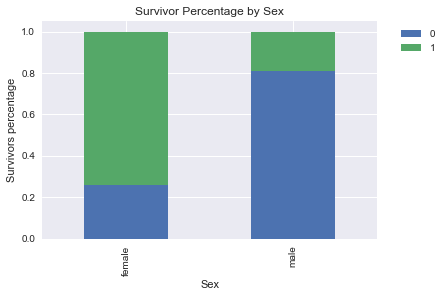

In [20]:
sex_surv_perc = titanic_data.groupby(["Sex", "Survived"]).size()/titanic_data.groupby("Sex").size()
sex_surv_perc.unstack().plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1.2, 1))
plt.title("Survivor Percentage by Sex")
plt.ylabel("Survivors percentage")

Nota-se que passageiros e tripulantes do sexo femenino apresentaram maior taxa de sobrevivência. Tal observação pode indicar que passageiros e tripulantes do sexo femenino foram privilegiados durante o naufrágio do Titanic. A política de prioridade à "* **mulheres** e crianças primeiro*" pode ser responsável por tal comportamento dos dados.

O gráfico de barras empilhadas abaixo ilustra o número de passageiros e tripulantes sobreviventes e mortos por gênero:

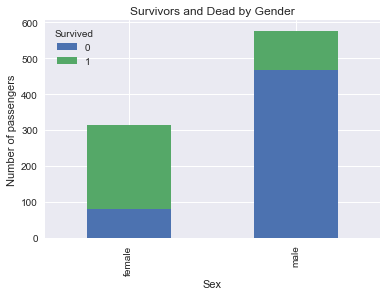

In [21]:
titanic_data.groupby(['Sex', 'Survived']).size().unstack().plot.bar(stacked=True)
plt.title("Survivors and Dead by Gender")
plt.ylabel("Number of passengers")

Observando o gráfico acima é nota-se que, apesar da maioria numérica de passageiros e tripulantes do sexo masculino, foram as mulheres que apresentaram a maior taxa de sobrevivência. 

### 3. *Qual faixa de idade apresentou maior proporção de sobreviventes?*

Inicialmente, comparou-se as distribuições da variável *Age* para passageiros sobreviventes e mortos utilizando boxplots e violin plots.

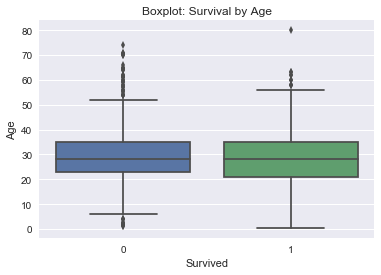

In [22]:
# Boxplot da variável Age em função da sobrevivência
bp_Age = sns.boxplot(x="Survived", y="Age", data=titanic_data)
plt.title("Boxplot: Survival by Age")

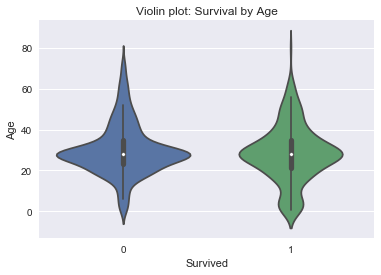

In [23]:
# Violin plot da variável Age em função da sobrevivência
vp_age = sns.violinplot(x="Survived", y="Age", data=titanic_data)
plt.title("Violin plot: Survival by Age")

Observando o boxplot e violin plot não é possóvel perceber grandes diferenças entre as médias das idades dos passageiros sobreviventes e mortos. O violin plot permite identificar uma concentração de dados à esquerda da distribuição dos dados de idades dos passageiros e tripulantes sobreviventes. Isto indica uma concentração de passageiros e tripulantes sobreviventes com idades menores.

A proporção de sobreviventes por categoria de idade (*AgeCategory*) pode ser obtida através do código abaixo:

In [24]:
# Pivotamento das variáveis AgeCategory e Survived
titanic_data[["AgeCategory", "Survived"]].groupby(["AgeCategory"], as_index = False).mean().sort_values(by='Survived', ascending=False)

,AgeCategory,Survived
1,Child,0.573529
3,Teenager,0.436620
0,Adult,0.365014
2,Elderly,0.269231


Nota-se que passageiros e tripulantes mais novos apresnetaram maior taxa de sobrevivência. A categiria *Child* apresentou maior taxa de sobrevivência, indicando uma provável aplicação da política de *"mulheres e **crianças** primeiro"*.

O violin plot abaixo mostra as distribuições das idades por categoria e realiza comparações entre passageiros e tripulantes sobreviventes e mortos. 

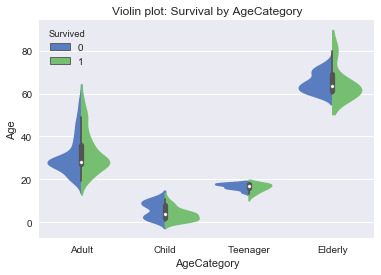

In [25]:
# Violin plots divididos para comparar as categorias de idade com a variável Survived
vp_agecategory = sns.violinplot(x="AgeCategory", y="Age", hue="Survived",data=titanic_data, palette="muted", split=True)
plt.title("Violin plot: Survival by AgeCategory")

### 4. *Passageiros com poucos parentes (irmãos, cônjugues, pais e filhos) apresentaram maior proporção de sobreviventes?*

Primeiramente, analisaremos a proporção de sobreviventes por número de irmãos e cônjugues (*SibSp*) a bordo do Titanic para cada passageiro.

In [26]:
# Pivotamento das variáveis SibSp e Survived
titanic_data[["SibSp", "Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Nota-se que passageiros e tripulantes que possuiam um ou dois irmãos ou cônjugues (*SibSp*) a bordo do Titanic apresentaram as maiores taxas de sobrevivência. Passageiros com três ou mais *SibSp* apresentaram as menores taxas de sobreviência. Já passageiros com zero *SibSp* apresentaram um taxa de sobrevivênia intermediária.

Pode-se supor que a presença de um *SibSp* seja benéfica para a sobrevivência do passageiro ou tripulante devido a uma possível ajuda mútua para sobreviver. Já o aumento do número de *SibSp* pode ser um fator que dificulte a sobrevivência devido a uma possível necessidade de prestar socorro a um número maior de parentes. O valor intermediário da taxa de sobrevivência para os passageiros e tripulentes com zero *SibSp* pode ser resultado falta de uma possível ajuda recebida pelo passageiro ou tripulante por um ou dois *SibSp*.

Analisando a proporção de sobreviventes por número de Pais ou Filhos a bordo do Titanic (*Parch*) temos:

In [27]:
# Pivotamento das variáveis Parch e Survived
titanic_data[["Parch", "Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Nota-se que passageiros e tripulantes que possuiam três, um ou dois pais ou filhos (*Parch*) a bordo do Titanic apresentaram as maiores taxas de sobrevivência. Passageiros com cinco ou mais *Parch* apresentaram as menores taxas de sobreviência. Já passageiros com zero *Parch* apresentaram um taxa de sobrevivênia intermediária.

O aumento do número de *Parch* (acima de três) pode ser um fator que dificulte a sobrevivência devido a uma possível necessidade de prestar socorro a um número maior de parentes. O valor intermediário da taxa de sobrevivência para os passageiros e tripulentes com zero *Parch* pode ser resultado falta de uma possível ajuda recebida pelo passageiro ou tripulante por um ou dois *Parch*.

Finalmente, analisaremos a proporção de sobreviventes por número parentes (*Family*) a bordo do Titanic para cada passageiro.

In [28]:
# Pivotamento das variáveis Family e Survived
titanic_data[["Family", "Survived"]].groupby(["Family"], as_index = False).mean().sort_values(by='Survived', ascending=False)

,Family,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


o gráfico de barras empilhadas abaixo ilustra a taxa de sobrevivência de passageiros e tripulantes por número de parentes a bordo do Titanic (*Family*):

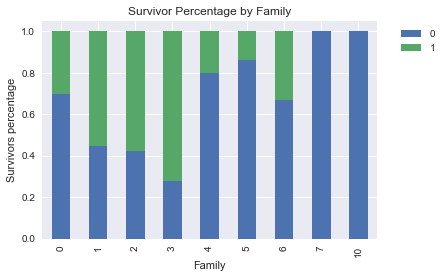

In [29]:
family_surv_perc = titanic_data.groupby(["Family", "Survived"]).size()/titanic_data.groupby("Family").size()
family_surv_perc.unstack().plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1.2, 1))
plt.title("Survivor Percentage by Family")
plt.ylabel("Survivors percentage")

Mais uma vez é possível notar que passageiros ou tripulantes com zero parentes a bordo do Titanic (*Family*) apresentaram uma taxa de sobrevivência intermediária e que a presença de *Family* é vantajosa até um certo número (neste caso, três).

O gráfico de barras empilhadas abaixo ilustra o número de passageiros e tripulantes sobreviventes e mortos por número de parentes a bordo do Titanic (*Family*):

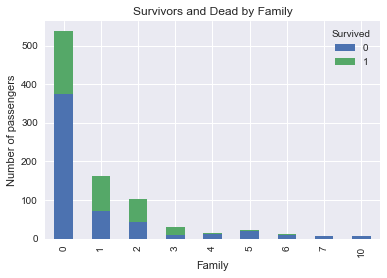

In [30]:
titanic_data.groupby(['Family', 'Survived']).size().unstack().plot.bar(stacked=True)
plt.title("Survivors and Dead by Family")
plt.ylabel("Number of passengers")

Nota-se que a maioria dos passageiros e tripulantes do Titanic encontravam-se desacompanhados.

### 5. *Passageiros que embarcaram em diferentes portos apresentaram diferentes proporções de sobreviventes?*

A proporção de sobreviventes por porto de embarque (*Embarked*) pode ser obtida através do código abaixo:

In [31]:
# Pivotamento das variáveis Embarked e Survived
titanic_data[["Embarked", "Survived"]].groupby(["Embarked"], as_index = False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


O gráfico de barras empilhadas abaixo ilustra a taxa de sobrevivência de passageiros e tripulantes por porto de embarque (*Embarked*):

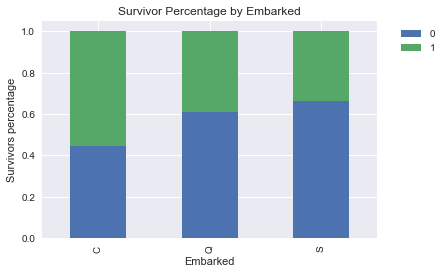

In [32]:
embarked_surv_perc = titanic_data.groupby(["Embarked", "Survived"]).size()/titanic_data.groupby("Embarked").size()
embarked_surv_perc.unstack().plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1.2, 1))
plt.title("Survivor Percentage by Embarked")
plt.ylabel("Survivors percentage")

Nota-se que passageiros e tripulantes que embarcaram no porto de Cherbourg (C) apresentaram  a maior taxa de sobrevivência, enquanto passageiros e tripulantes que embarcaram nos demais portos apresentaram taxas de sobrevivência menores, porém semelhantes.

O gráfico de barras empilhadas abaixo ilustra o número de passageiros e tripulantes sobreviventes e mortos por porto de embarque (*Embarked*):

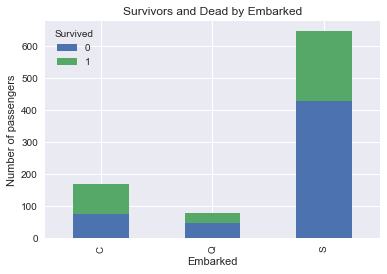

In [33]:
titanic_data.groupby(['Embarked', 'Survived']).size().unstack().plot.bar(stacked=True)
plt.title("Survivors and Dead by Embarked")
plt.ylabel("Number of passengers")

Nota-se que a maioria dos passageiros embarcou no porto de Southampton (S).

### ANÁLISES ADICIONAIS

A classe FacetGrid é útil quando você deseja visualizar a distribuição de uma variável ou a relação entre várias variáveis separadamente em subconjuntos de seu conjunto de dados. Os gráficos abaixo correlacionam as variáves categóricas (*Sex*) e discretas (*Pclass* e *Survived*).

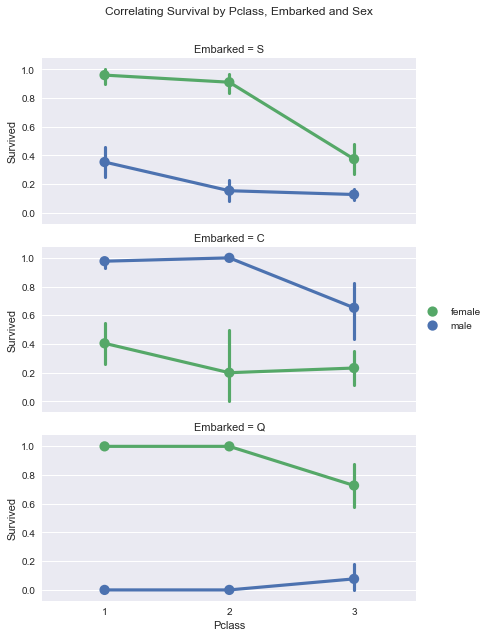

In [34]:
g = sns.FacetGrid(titanic_data, row='Embarked', size=3, aspect=2)
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Correlating Survival by Pclass, Embarked and Sex")

Observa-se que:
* Passageiros e tripulantes do sexo femenino apresentaram maior taxa de sobrevivência (com exceção de passageiros que embarcaram no porto de Cherbourg - C).
* Passageiros e tripulantes da classe sócio-econômica 3 do sexo masculino apresentaram a amior taxa de sobrevivência para o porto de embarque de Queenstown (Q), diferentemente do que ocorre para os demais portos.

### CONCLUSÕES

#### 1. Passageiros de classe sócio-econômica (*Pclass*) mais elevada apresentaram maior proporção de sobreviventes?
Sim. Passageiros ou tripulantes da primeira classe (Pclass = 1) apresentaram a maior taxa de sobrevivência.

#### 2. Houve diferença entre as proporções de sobreviventes para homens e mulheres?
Sim. Passageiros e tripulantes do sexo femenino apresentaram maior taxa de sobrevivência.

#### 3. Qual faixa de idade apresentou maior proporção de sobreviventes?
A categoria *Child* (idade inferior a 12 anos) apresentou a maior taxa de sobrevivência. 

#### 4. Passageiros com poucos parentes (irmãos, cônjugues, pais e filhos) apresentaram maior proporção de sobreviventes?
Não necessariamente. Passageiros ou tripulantes desacompanhados (*Family* = 0) apresentaram taxa de sobrevivência intermediária. Passageiros com 3 parentes a bordo do Titanic apresnetaram a maior taxa de sobrevivência.

#### 5. Passageiros que embarcaram em diferentes portos apresentaram diferentes proporções de sobreviventes?
Sim. Passageiros e tripulantes que embarcaram no porto de Cherbourg (C) apresentaram a maior taxa de sobrevivência.

### VARIÁVEIS OCULTAS

É possível inferir variáveis ocultas a partir das variáveis disponíveis na base de dados fornecida. Variávies como localização (1º andar, 2º andar, 3º andar, etc.) e estado (dormindo ou acordado) podem ter grande influência na sobrevivência dos passageiros e tripulantes, entretanto não constam na base de dados. Salienta-se que qualquer aparente correlação entre as variáveis análisadas não configura casualidade.

### SUGESTÕES PARA FUTURAS ANÁLISES

A variável *Cabin* não foi analisada neste trabalho devido ao grande número de dados faltantes. Sugere-se avaliar a possibilidade de preenchimento dos dados faltantes através de uma interpolação entre as variáveis *Ticket *, *Pclass* e *Fare*.

Novas variáveis também podem ser criadas a partir das variáves disponibilizadas na base de dados. Sugere-se a criação de uma nova variável baseada nos títulos (Capt, Dr, Miss, Mrs, Mr, etc.) presentes nos nomes dos passageiros e tripulantes. O objetivo seria avaliar a taxa de sobrevivência de passageiros e tripulantes com diferentes títulos.

Nota-se que os passageiros que embarcaram em Southampton apresentaram a menor taxa de sobrevivência, enquanto os passageiros que embarcaram em Cherbourg apresentaram a maior taxa de sobrevivência.